### Importing the necessary libraries



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
import plotly.express as px
import folium
from folium import plugins

plt.rcParams["figure.figsize"] = (6,4)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('customer_data.csv')

### Analysing the data

In [3]:
df.head()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,CustomerSince,NumPurchases,LoyaltyPoints
0,1.0,56.0,Male,NaN,18.0,2016-03-30,11.0,1471.0
1,2.0,69.0,Female,73565.0,12.0,2016-07-01,60.0,826.0
2,3.0,46.0,Female,70342.0,72.0,2021-10-11,65.0,1428.0
3,4.0,32.0,Female,57723.0,97.0,2016-09-27,76.0,2443.0
4,5.0,60.0,Male,50572.0,46.0,2023-07-20,4.0,4874.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     9500 non-null   float64
 1   Age            9500 non-null   float64
 2   Gender         9500 non-null   object 
 3   AnnualIncome   9500 non-null   float64
 4   SpendingScore  9500 non-null   float64
 5   CustomerSince  9500 non-null   object 
 6   NumPurchases   9500 non-null   float64
 7   LoyaltyPoints  9500 non-null   float64
dtypes: float64(6), object(2)
memory usage: 625.1+ KB


In [5]:
df.isnull().sum()

CustomerID       500
Age              500
Gender           500
AnnualIncome     500
SpendingScore    500
CustomerSince    500
NumPurchases     500
LoyaltyPoints    500
dtype: int64

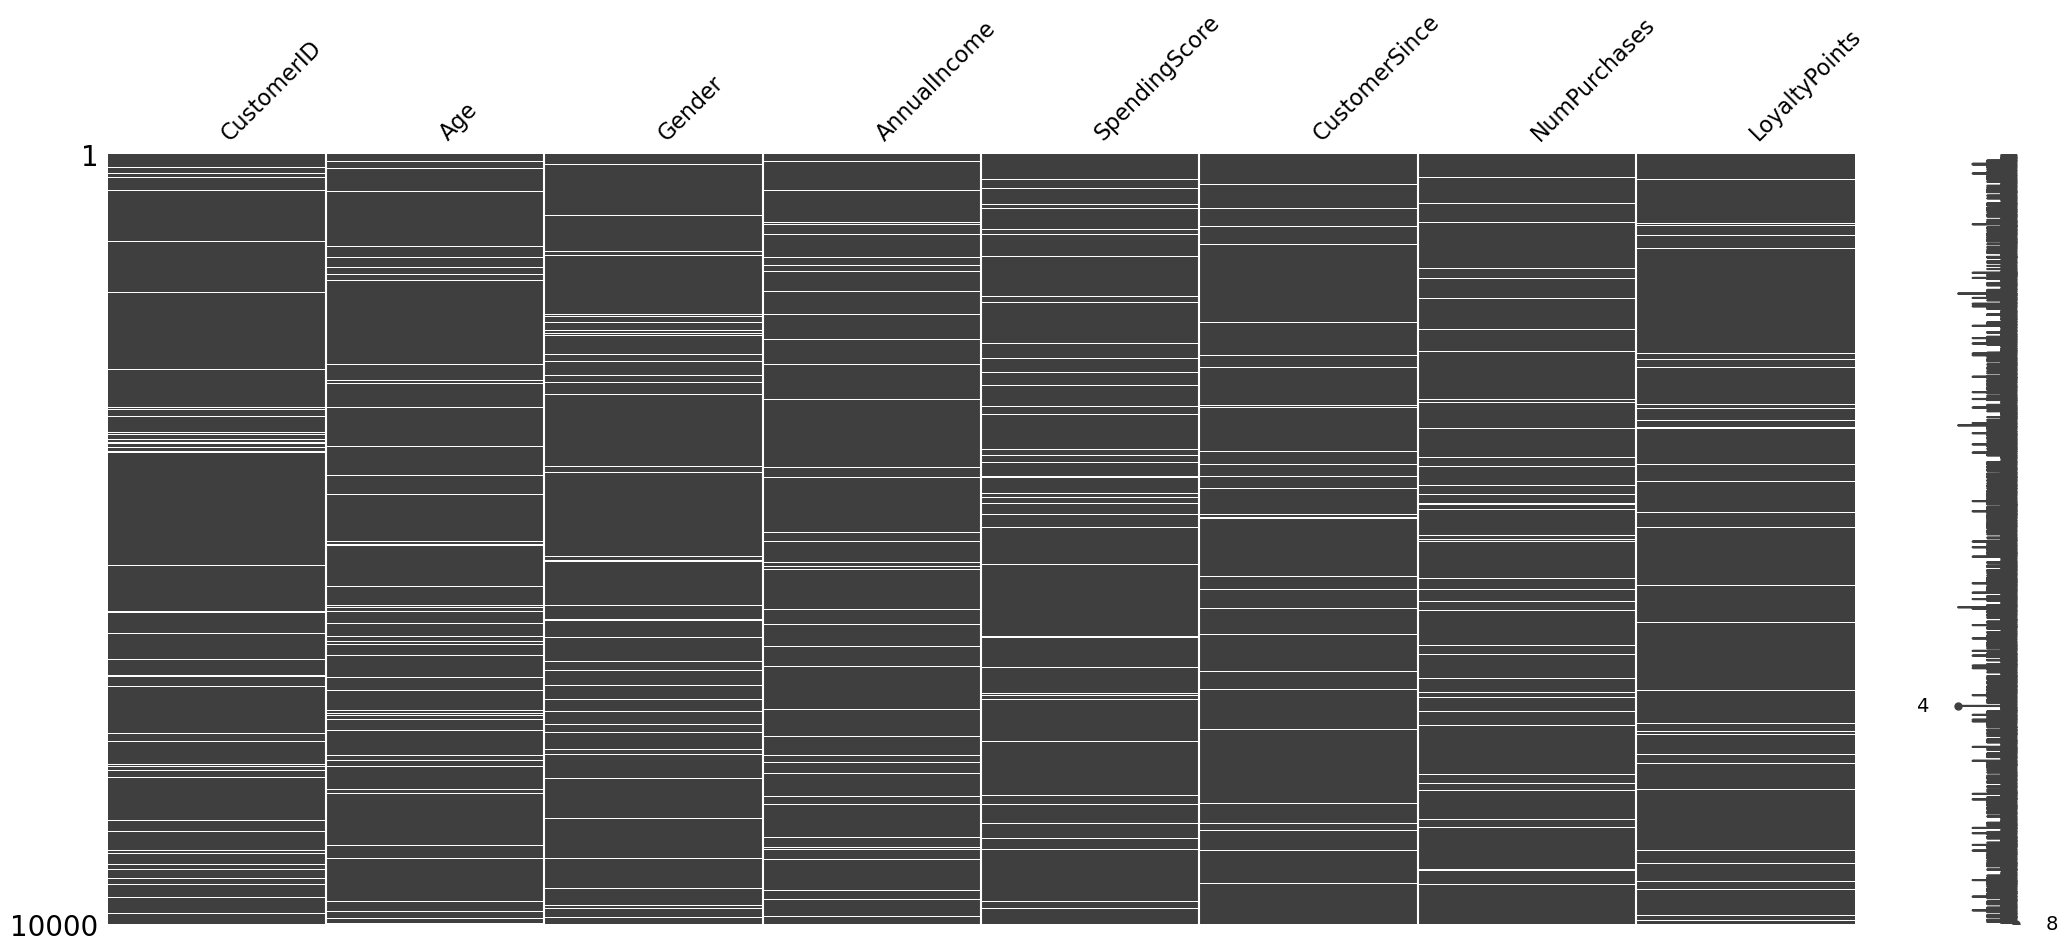

In [6]:
msno.matrix(df)
plt.show()

In [7]:
df.sample(5)

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,CustomerSince,NumPurchases,LoyaltyPoints
7642,7643.0,41.0,Male,52429.0,38.0,2017-07-07,4.0,3440.0
4782,4783.0,40.0,Male,91325.0,44.0,2017-01-07,48.0,3539.0
2128,2129.0,62.0,Female,80206.0,63.0,2022-06-14,71.0,1467.0
6487,6488.0,21.0,Female,35319.0,16.0,2022-07-09,59.0,3870.0
8693,8694.0,63.0,Female,73742.0,46.0,2015-09-13,15.0,2715.0


### Operations on incomplete data

In [8]:
# Delete the rows with missing CustomerID
df = df.dropna(subset=['CustomerID'])

In [9]:
# Age sütunundaki eksik verileri median (ortanca) ile doldurmak
df['Age'].fillna(df['Age'].median(), inplace=True)


In [10]:
# Fill missing data in the AnnualIncome column with the median
df['AnnualIncome'].fillna(df['AnnualIncome'].median(), inplace=True)


In [11]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,NumPurchases,LoyaltyPoints
count,9500.000000,9500.000000,9500.000000,9022.000000,9028.000000,9019.000000
mean,4997.453474,43.503895,67484.103368,49.955331,50.347253,2503.452600
std,2893.455449,14.547572,29904.804824,28.943575,28.534297,1448.306966
min,1.000000,18.000000,15014.000000,1.000000,1.000000,0.000000
25%,2486.750000,32.000000,41654.750000,25.000000,26.000000,1267.000000
50%,4996.500000,43.000000,67285.500000,50.000000,50.000000,2517.000000
75%,7501.250000,56.000000,93340.000000,75.000000,75.000000,3758.000000
max,10000.000000,69.000000,119987.000000,100.000000,99.000000,4999.000000


In [12]:
# Fill missing data in the LoyaltyPoints column with median
df['LoyaltyPoints'].fillna(df['LoyaltyPoints'].median(), inplace=True)


In [13]:
# Fill missing data in the CustomerSince column with the most common value
df['CustomerSince'].fillna(df['CustomerSince'].mode()[0], inplace=True)


In [14]:
# Fill missing data in the Gender column with the most common value
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Fill missing data in the NumPurchases column with the median
df['NumPurchases'].fillna(df['NumPurchases'].median(), inplace=True)


In [15]:
df.isnull().sum()

CustomerID         0
Age                0
Gender             0
AnnualIncome       0
SpendingScore    478
CustomerSince      0
NumPurchases       0
LoyaltyPoints      0
dtype: int64

In [16]:
df.sample(5)

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,CustomerSince,NumPurchases,LoyaltyPoints
3504,3505.0,44.0,Female,52377.0,8.0,2017-11-22,57.0,696.0
8225,8226.0,28.0,Male,60798.0,59.0,2017-07-08,84.0,2943.0
9027,9028.0,33.0,Male,100873.0,9.0,2015-09-06,49.0,3683.0
6345,6346.0,43.0,Female,75506.0,97.0,2016-07-19,62.0,2069.0
3812,3813.0,55.0,Male,62287.0,41.0,2016-06-05,56.0,2585.0


In [17]:
# Fill missing data in the SpendingScore column with the median
df['SpendingScore'].fillna(df['SpendingScore'].median(), inplace=True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9500 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     9500 non-null   float64
 1   Age            9500 non-null   float64
 2   Gender         9500 non-null   object 
 3   AnnualIncome   9500 non-null   float64
 4   SpendingScore  9500 non-null   float64
 5   CustomerSince  9500 non-null   object 
 6   NumPurchases   9500 non-null   float64
 7   LoyaltyPoints  9500 non-null   float64
dtypes: float64(6), object(2)
memory usage: 668.0+ KB


### Data visualisation section

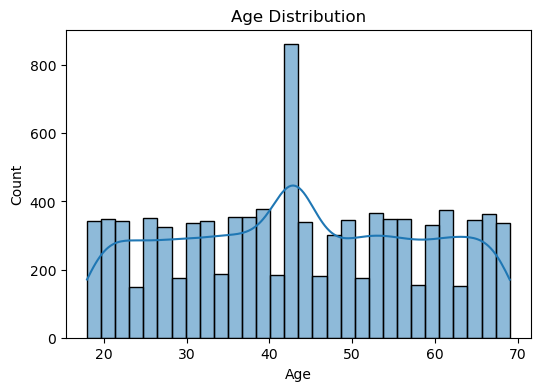

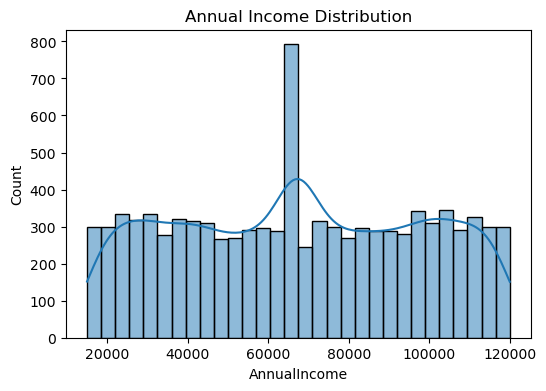

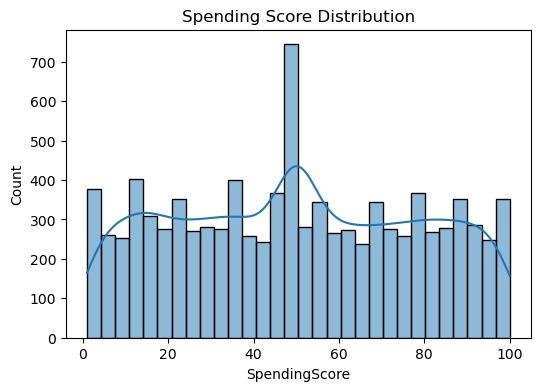

In [19]:
# Age distribution
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

# Annual Income distribution
sns.histplot(df['AnnualIncome'], kde=True, bins=30)
plt.title('Annual Income Distribution')
plt.show()

# Expenditure Score distribution
sns.histplot(df['SpendingScore'], kde=True, bins=30)
plt.title('Spending Score Distribution')
plt.show()


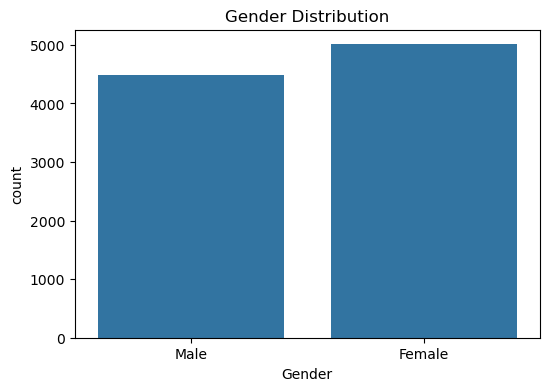

In [20]:
# Gender distribution (Countplot)
sns.countplot(x='Gender', data=df)
plt.title('Gender Distribution')
plt.show()


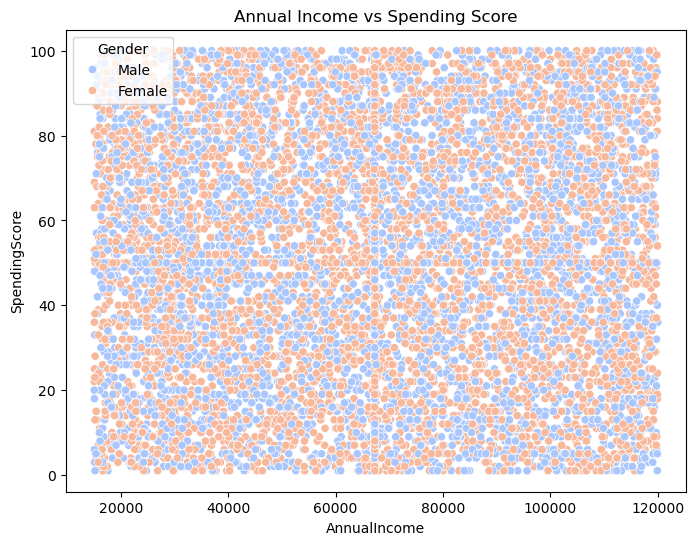

In [21]:
# The relationship between annual income and expenditure score
plt.figure(figsize=(8,6))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df, hue='Gender', palette='coolwarm')
plt.title('Annual Income vs Spending Score')
plt.show()


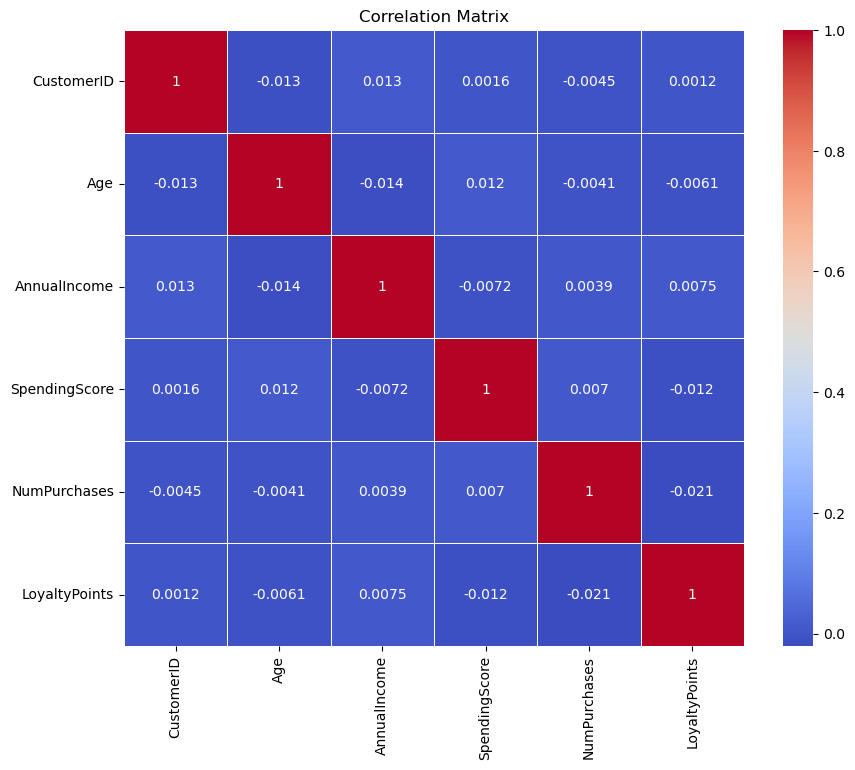

In [22]:
# Let's select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Korelasyon matrisi
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


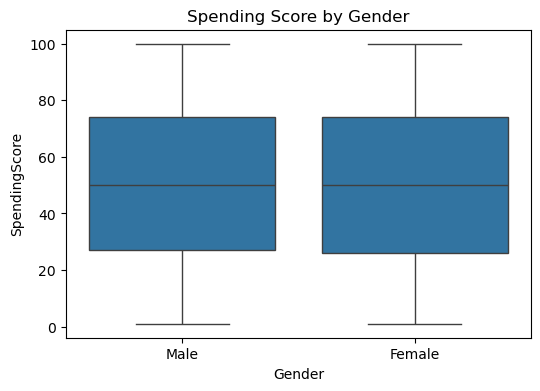

In [23]:
# Box plot of expenditure score by gender
sns.boxplot(x='Gender', y='SpendingScore', data=df)
plt.title('Spending Score by Gender')
plt.show()
